<a href="https://colab.research.google.com/github/priyankabansall/PRIYANKA_BANSAL/blob/main/PRIYANKA_BANSAL_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

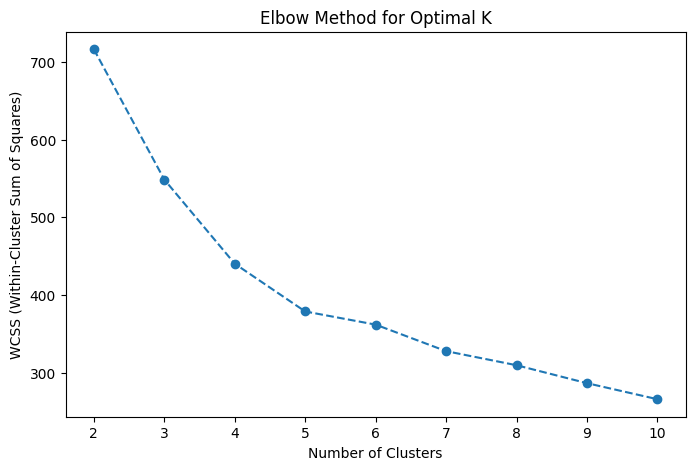

Davies-Bouldin Index: 1.11
Silhouette Score: 0.31


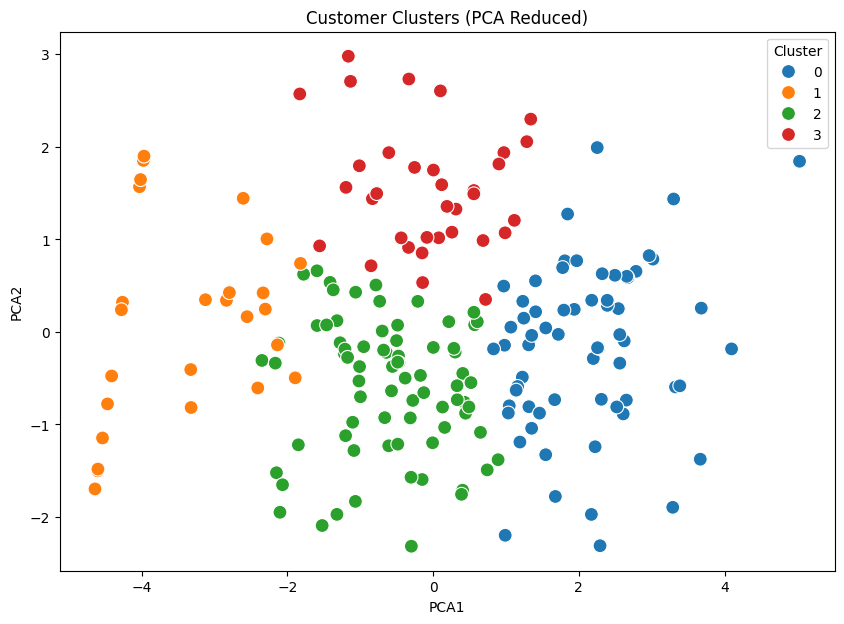

Clustering results saved as 'PRIYANKA_BANSAL_Clustering.csv'.


In [5]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# Load datasets
customers = pd.read_csv("Customers.csv")
transactions = pd.read_csv("Transactions.csv")
products = pd.read_csv("Products.csv")

# Merge datasets
merged = transactions.merge(customers, on="CustomerID").merge(products, on="ProductID")

# Create customer-level features
customer_features = (
    merged.groupby("CustomerID")
    .agg(
        TotalSpending=("TotalValue", "sum"),
        AvgSpending=("TotalValue", "mean"),
        TransactionCount=("TransactionID", "count"),
        UniqueProducts=("ProductID", "nunique"),
        UniqueCategories=("Category", "nunique"),
        RecencyDays=("TransactionDate", lambda x: (pd.to_datetime(x.max()) - pd.to_datetime(x.min())).days),
    )
    .reset_index()
)

# Fill missing values
customer_features.fillna(0, inplace=True)

# Standardize numerical features
scaler = StandardScaler()
numerical_cols = ["TotalSpending", "AvgSpending", "TransactionCount", "UniqueProducts", "UniqueCategories", "RecencyDays"]
scaled_features = scaler.fit_transform(customer_features[numerical_cols])

#APPLY K-MEANS CLUSTERING
# Determine the optimal number of clusters
wcss = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), wcss, marker="o", linestyle="--")
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.show()

# Choose the optimal number of clusters (e.g., k=3 based on elbow plot)
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
customer_features["Cluster"] = kmeans.fit_predict(scaled_features)

# Calculate Davies-Bouldin Index
db_index = davies_bouldin_score(scaled_features, customer_features["Cluster"])
print(f"Davies-Bouldin Index: {db_index:.2f}")

# Calculate Silhouette Score
silhouette_avg = silhouette_score(scaled_features, customer_features["Cluster"])
print(f"Silhouette Score: {silhouette_avg:.2f}")

# VISUALIZE CLUSTERS
# Reduce to 2D for visualization using PCA
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)
customer_features["PCA1"] = reduced_features[:, 0]
customer_features["PCA2"] = reduced_features[:, 1]

# Scatter plot of clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x="PCA1",
    y="PCA2",
    hue="Cluster",
    data=customer_features,
    palette="tab10",
    s=100,
)
plt.title("Customer Clusters (PCA Reduced)")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.legend(title="Cluster")
plt.show()

# Save clustering results
customer_features.to_csv("PRIYANKA_BANSAL_Clustering.csv", index=False)
print("Clustering results saved as 'PRIYANKA_BANSAL_Clustering.csv'.")


Davies-Bouldin Index: 0.36


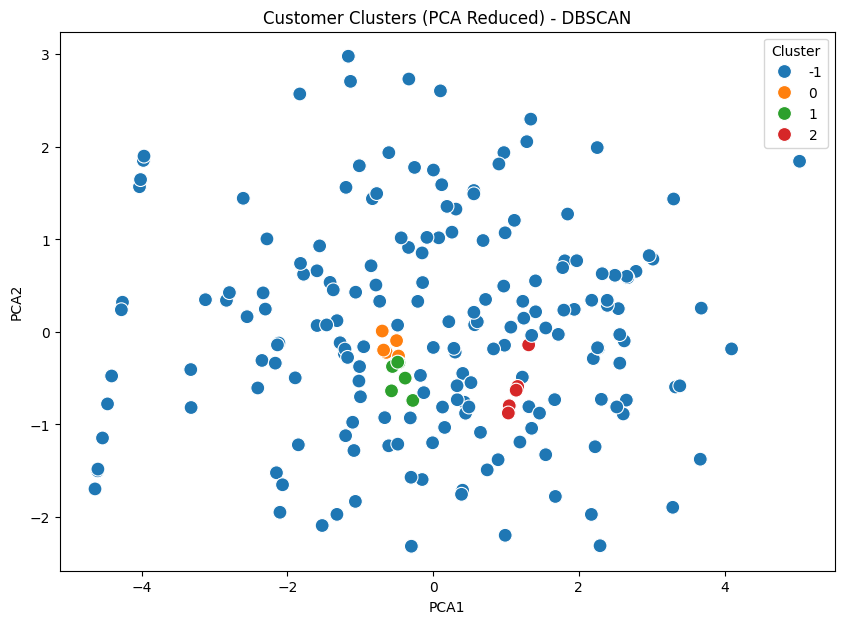

Clustering results saved as 'PRIYANKA_BANSAL_ClusteringDBSCAN.csv'.


In [6]:


#APPLY DBSCAN CLUSTERING
dbscan = DBSCAN(eps=0.5, min_samples=5)
customer_features["Cluster"] = dbscan.fit_predict(scaled_features)

# CLUSTER EVALUATION
valid_clusters = customer_features[customer_features["Cluster"] != -1]
db_index = davies_bouldin_score(scaled_features[valid_clusters.index], valid_clusters["Cluster"])
print(f"Davies-Bouldin Index: {db_index:.2f}")

# VISUALIZE CLUSTERS
# Reduce data to 2D for visualization using PCA
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)
customer_features["PCA1"] = reduced_features[:, 0]
customer_features["PCA2"] = reduced_features[:, 1]

# Scatter plot of clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x="PCA1",
    y="PCA2",
    hue="Cluster",
    data=customer_features,
    palette="tab10",
    s=100,
    marker="o",
)
plt.title("Customer Clusters (PCA Reduced) - DBSCAN")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.legend(title="Cluster")
plt.show()

# ---- SAVE RESULTS ----
# Save clustering results to a CSV
customer_features.to_csv("PRIYANKA_BANSAL_ClusteringDBSCAN.csv", index=False)
print("Clustering results saved as 'PRIYANKA_BANSAL_ClusteringDBSCAN.csv'.")
